In [1]:
import compression
import matplotlib.pyplot as plt


In [ ]:
compressor = compression.HaarImageCompressor(compression_method="matrix", target_compression_ratio=200)
compressor.load_image("cam.png")
compressor.compress_image()

plt.imshow(compressor.uncompressed_image, cmap='gray')
plt.title("Uncompressed")
plt.show()
plt.imshow(compressor.compressed_image, cmap='gray')
plt.title("Compressed, compression ratio of {:.2f}".format(compressor.actual_compression_ratio))
plt.show()

In [5]:
del compression


In [4]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from haar import *

%matplotlib inline

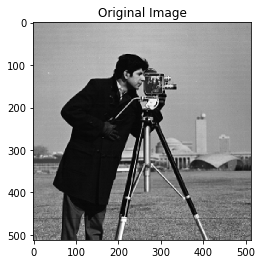

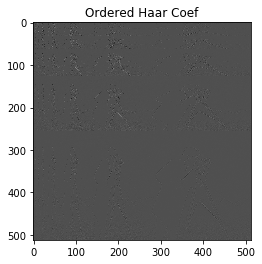

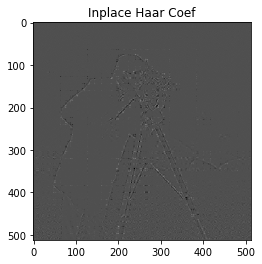

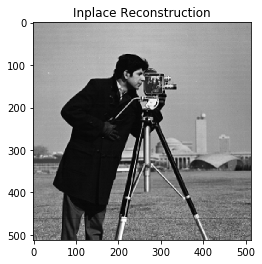

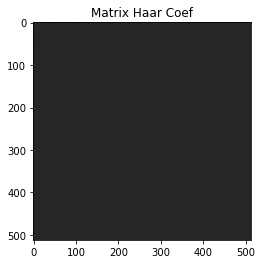

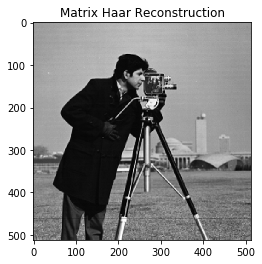

In [2]:
cam = imageio.imread("imageio:camera.png")
imageio.imsave("cam.png", cam)
cam = imageio.imread("cam.png").astype(float)
plt.imshow(cam, cmap='gray')
plt.title("Original Image")
plt.show()

xform_cam = ordered_fast_2d_haar_transform(cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("Ordered Haar Coef")
plt.show()
# imageio.imsave("ordered_xform.png", xform_cam)

# xform_cam = ordered_inverse_fast_2d_haar_transform(cam).astype(np.uint8)
# imageio.imsave("ordered_inverse_xform.png", xform_cam)

xform_cam = inplace_fast_2d_haar_transform(cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("Inplace Haar Coef")
plt.show()
# imageio.imsave("inplace_xform.png", xform_cam)

xform_cam = inplace_inverse_fast_2d_haar_transform(xform_cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("Inplace Reconstruction")
plt.show()
# imageio.imsave("inplace_inverse_cam_xform.png", xform_cam)

xform_cam = matrix_2d_haar_transform(cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("Matrix Haar Coef")
plt.show()
# imageio.imsave("matrix_xform.png", xform_cam)

xform_cam = matrix_inverse_2d_haar_transform(xform_cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("Matrix Haar Reconstruction")
plt.show()
# imageio.imsave("matrix_inverse_xform.png", xform_cam)

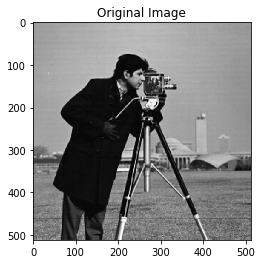

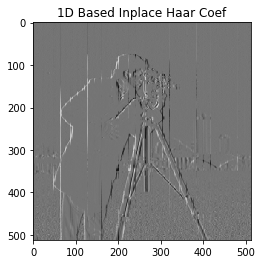

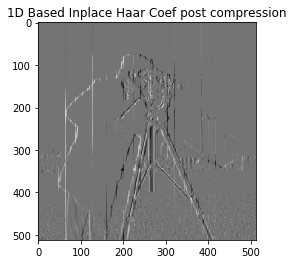

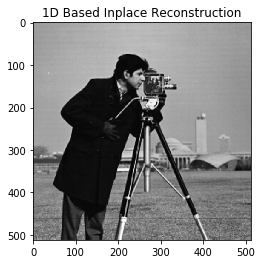

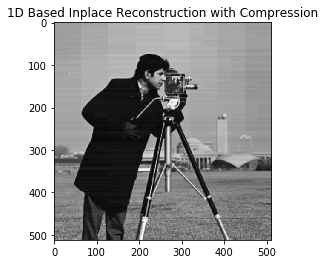

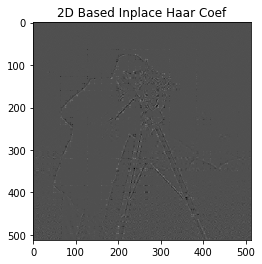

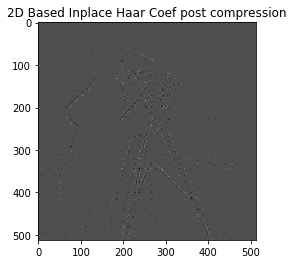

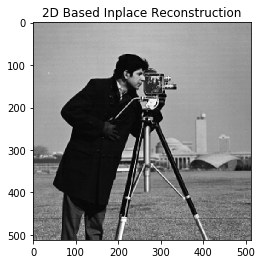

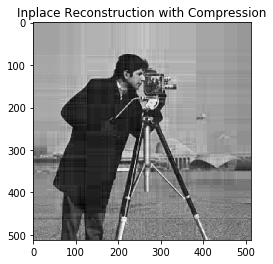

Threshold value of 3
Original has 35039 zero valued Haar coef
1D Based Compressed has 198280 zero valued Haar coef
1D Based Compression ratio of 5.4756841843638675
2D Based Compressed has 239416 zero valued Haar coef
2D Based Compression ratio of 6.832843403065156


In [9]:
cam = imageio.imread("cam.png").astype(float)
plt.imshow(cam, cmap='gray')
plt.title("Original Image")
plt.show()
image_shape = cam.shape

xform_cam = inplace_fast_1d_haar_transform(cam.flatten()).reshape(image_shape)
plt.imshow(xform_cam, cmap='gray')
plt.title("1D Based Inplace Haar Coef")
plt.show()
oned_uncompressed_zero_elements = np.count_nonzero(xform_cam == 0)

compressed_xform_cam = inplace_fast_1d_haar_transform(cam.flatten()).reshape(image_shape)
thresh = 3
thresh_indices = abs(compressed_xform_cam) < abs(thresh)
compressed_xform_cam[thresh_indices] = 0
plt.imshow(compressed_xform_cam, cmap='gray')
plt.title("1D Based Inplace Haar Coef post compression")
plt.show()
oned_compressed_zero_elements = np.count_nonzero(compressed_xform_cam == 0)

xform_cam = inplace_inverse_fast_1d_haar_transform(xform_cam.flatten()).reshape(image_shape)
plt.imshow(xform_cam, cmap='gray')
plt.title("1D Based Inplace Reconstruction")
plt.show()

xform_cam = inplace_inverse_fast_1d_haar_transform(compressed_xform_cam.flatten()).reshape(image_shape)
plt.imshow(xform_cam, cmap='gray')
plt.title("1D Based Inplace Reconstruction with Compression")
plt.show()

xform_cam = inplace_fast_2d_haar_transform(cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("2D Based Inplace Haar Coef")
plt.show()
uncompressed_zero_elements = np.count_nonzero(xform_cam == 0)

compressed_xform_cam = inplace_fast_2d_haar_transform(cam)
thresh = 3
thresh_indices = abs(compressed_xform_cam) < abs(thresh)
compressed_xform_cam[thresh_indices] = 0
plt.imshow(compressed_xform_cam, cmap='gray')
plt.title("2D Based Inplace Haar Coef post compression")
plt.show()
compressed_zero_elements = np.count_nonzero(compressed_xform_cam == 0)

xform_cam = inplace_inverse_fast_2d_haar_transform(xform_cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("2D Based Inplace Reconstruction")
plt.show()

compressed_cam = inplace_inverse_fast_2d_haar_transform(compressed_xform_cam)
plt.imshow(compressed_cam, cmap='gray')
plt.title("Inplace Reconstruction with Compression")
plt.show()

print("Threshold value of {}".format(thresh))
print("Original has {} zero valued Haar coef".format(uncompressed_zero_elements))
print("1D Based Compressed has {} zero valued Haar coef".format(oned_compressed_zero_elements))
print("1D Based Compression ratio of {}".format(oned_compressed_zero_elements/oned_uncompressed_zero_elements))
print("2D Based Compressed has {} zero valued Haar coef".format(compressed_zero_elements))
print("2D Based Compression ratio of {}".format(compressed_zero_elements/uncompressed_zero_elements))